In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import path
from sklearn import preprocessing
pd.options.mode.chained_assignment = None

## Data Cleaning

In [2]:
df = pd.read_csv("data/listings_1.csv")

In [3]:
df = df.loc[df["room_type"] == "Entire home/apt"]

In [4]:
df2 = df[["host_response_time", "host_response_rate", "host_is_superhost", "host_listings_count", "host_identity_verified", "neighbourhood_cleansed", "accommodates", "bathrooms_text", "bedrooms", "beds", "price", "minimum_nights", "availability_90", "availability_365", "number_of_reviews", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "instant_bookable"]]

In [5]:
df2["price"] = df2["price"].replace('[\$,]', '', regex=True).astype(float)

In [6]:
df2.drop(df2[(df2["availability_365"]<30) | (df2["number_of_reviews"]<10) | (df2["minimum_nights"]>7) | (df2["price"]>2500)].index, inplace=True)

In [7]:
df2["bathrooms"] = df2["bathrooms_text"].str.extract(r'(\d*\.?\d*)')

In [8]:
df2["bathrooms"].replace("","0",inplace=True)

In [9]:
df2["bathrooms"] = df2["bathrooms"].astype(float)

In [10]:
df2["bathrooms_text"] = df2["bathrooms"]
df2.drop(columns=["bathrooms"],inplace=True)
df2.rename(columns={"bathrooms_text": "bathrooms"},inplace=True)

In [11]:
# df2["bathrooms"].unique().tolist()

In [12]:
# df2["bathrooms"].mean()

In [13]:
df2["host_listings_count"] = df2["host_listings_count"].astype("int64")

In [14]:
df2.replace({"host_response_time": {"within an hour":4, "within a few hours":3, "within a day":2, "a few days or more":1}},inplace=True)

In [15]:
df2.replace({"host_is_superhost": {"t":1, "f":0}},inplace=True)

In [16]:
df2.replace({"host_identity_verified": {"t":1, "f":0}},inplace=True)

In [17]:
df2.replace({"instant_bookable": {"t":1, "f":0}},inplace=True)

In [18]:
df2["host_response_rate"] = df2["host_response_rate"].str[:-1].astype(float)

In [19]:
df2.dropna(inplace=True)

In [20]:
df2["score"] = (df2["price"] * .1/(df2["availability_365"]/365) * df2["review_scores_rating"] * df2["number_of_reviews"]).round(decimals=2)

In [21]:
# df2["score"].sort_values(ascending=False)

In [22]:
# df2 = pd.get_dummies(df2)

In [23]:
df2["score_normalized"] = preprocessing.scale(df2["score"])

In [24]:
df2.drop(columns=["score"], inplace=True)

In [25]:
# df2["neighbourhood_cleansed"].value_counts()

In [26]:
# df3 = df2.groupby("neighbourhood_cleansed")["review_scores_location"].mean().sort_values(ascending=False)
# df3.to_csv(r'avg_loc_rating.csv', index = True)

In [27]:
df2.drop(columns=["neighbourhood_cleansed"], inplace=True)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 1 to 5988
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           1572 non-null   float64
 1   host_response_rate           1572 non-null   float64
 2   host_is_superhost            1572 non-null   int64  
 3   host_listings_count          1572 non-null   int64  
 4   host_identity_verified       1572 non-null   int64  
 5   accommodates                 1572 non-null   int64  
 6   bathrooms                    1572 non-null   float64
 7   bedrooms                     1572 non-null   float64
 8   beds                         1572 non-null   float64
 9   price                        1572 non-null   float64
 10  minimum_nights               1572 non-null   int64  
 11  availability_90              1572 non-null   int64  
 12  availability_365             1572 non-null   int64  
 13  number_of_reviews 

In [29]:
df2.reset_index(drop=True, inplace=True)
df2.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,score_normalized
0,4.0,100.0,1,2,1,2,1.0,1.0,1.0,65.0,...,401,4.66,4.83,4.52,4.89,4.85,4.87,4.72,0,2.034834
1,4.0,100.0,1,10,1,4,1.0,2.0,2.0,143.0,...,28,4.50,4.64,4.68,4.68,4.64,4.96,4.54,1,-0.408064
2,3.0,92.0,0,3,1,2,1.0,1.0,1.0,99.0,...,11,4.73,4.73,4.73,4.64,4.73,4.73,4.73,0,-0.609725
3,3.0,100.0,1,3,1,6,2.0,3.0,3.0,214.0,...,97,4.69,4.78,4.65,4.87,4.83,4.85,4.63,0,0.084744
4,4.0,100.0,0,0,1,4,1.0,1.0,2.0,69.0,...,22,4.76,4.67,4.48,4.76,4.95,4.48,4.67,0,-0.601280


In [30]:
df2["score_normalized"].sort_values(ascending=False)

428     17.876008
913     10.769339
176      9.285035
264      6.246178
7        6.242826
          ...    
1074    -0.621219
1490    -0.621361
1397    -0.622009
1489    -0.622485
1445    -0.623160
Name: score_normalized, Length: 1572, dtype: float64

In [31]:
# df2.loc[428]

## Building/testing models

In [32]:
selected_features = df2.drop(columns=["score_normalized"])

In [33]:
y = df2["score_normalized"]
print(selected_features.shape, y.shape)

(1572, 22) (1572,)


In [34]:
# Creating test/train split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.3, random_state=21)

In [35]:
import xgboost as xgb
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [36]:
# Scaling the data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_scaled, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train_scaled)
val_preds_xgb_reg = xgb_reg.predict(X_test_scaled)

In [38]:
print("Training MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Test MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("Training Score (R Squared):", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Test Score (R Squared):", round(r2_score(y_test, val_preds_xgb_reg),4))

Training MSE: 0.0
Test MSE: 0.1693
Training Score (R Squared): 1.0
Test Score (R Squared): 0.6101


In [39]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True, ascending=False)
ft_weights_xgb_reg = ft_weights_xgb_reg[~ft_weights_xgb_reg.index.str.contains("neighbourhood")]
ft_weights_xgb_reg

,weight
review_scores_location,0.264818
number_of_reviews,0.233358
availability_365,0.230521
accommodates,0.116346
price,0.104007
beds,0.010542
host_listings_count,0.009448
review_scores_accuracy,0.005225
host_identity_verified,0.004823
review_scores_rating,0.004623


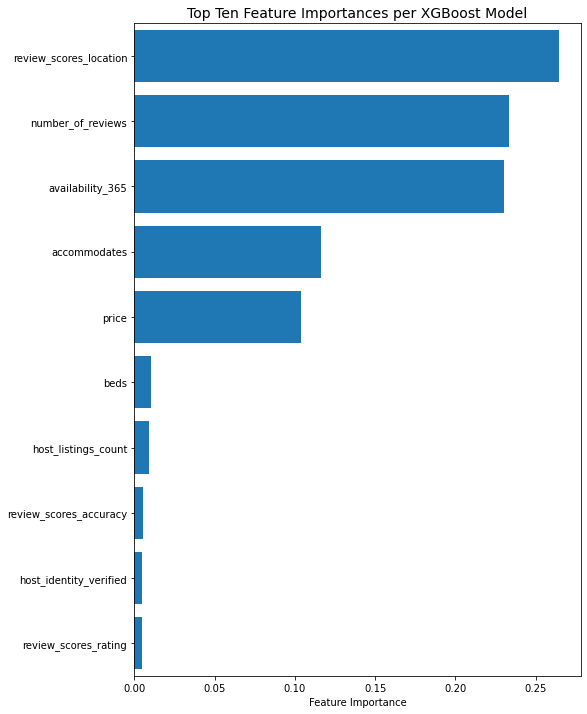

In [40]:
# Plotting feature importances
plt.figure(figsize=(8,12))
plt.barh(ft_weights_xgb_reg.index[:10], ft_weights_xgb_reg.weight[:10], align='center') 
plt.title("Top Ten Feature Importances per XGBoost Model", fontsize=14)
plt.xlabel("Feature Importance")
plt.margins(y=0.01)
plt.gca().invert_yaxis()
plt.show()

In [41]:
# # Creating the GridSearchCV model
# from sklearn.model_selection import GridSearchCV

In [42]:
# def algorithm_pipeline(X_train_scaled, X_test_scaled, y_train, y_test, 
#                        model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
#                        do_probabilities = False):
#     gs = GridSearchCV(
#         estimator=model,
#         param_grid=param_grid, 
#         cv=cv, 
#         n_jobs=-1, 
#         scoring=scoring_fit,
#         verbose=2
#     )
#     fitted_model = gs.fit(X_train_scaled, y_train)
    
#     if do_probabilities:
#       pred = fitted_model.predict_proba(X_test_scaled)
#     else:
#       pred = fitted_model.predict(X_test_scaled)
    
#     return fitted_model, pred

In [43]:
# param_grid = {
#     'n_estimators': [400, 700, 1000],
#     'colsample_bytree': [0.7, 0.8],
#     'gamma': [0.5, 1, 2],
#     'max_depth': [5,10,20],
#     'reg_alpha': [1.1, 1.2, 1.3],
#     'reg_lambda': [1.1, 1.2, 1.3],
#     'subsample': [0.7, 0.8, 0.9]
# }

# model, pred = algorithm_pipeline(X_train_scaled, X_test_scaled, y_train, y_test, xgb_reg, 
#                                  param_grid, cv=3)

# # Root Mean Squared Error
# print(np.sqrt(-model.best_score_))
# print(model.best_params_)

In [44]:
from keras import models, layers, optimizers, regularizers

In [45]:
# Building the model
nn = models.Sequential()
nn.add(layers.Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'))
nn.add(layers.Dense(256, activation='relu'))
nn.add(layers.Dense(256, activation='relu'))
nn.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2944      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 102,017
Trainable params: 102,017
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
nn.fit(X_train_scaled, y_train, epochs=100, batch_size=256, validation_split=0.3);

Epoch 1/100
4/4 [==============================] - 10s 138ms/step - loss: 1.7672 - mean_squared_error: 1.7672 - val_loss: 0.8295 - val_mean_squared_error: 0.8295
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1.1511 - mean_squared_error: 1.1511 - val_loss: 0.7560 - val_mean_squared_error: 0.7560
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1222 - mean_squared_error: 1.1222 - val_loss: 0.7529 - val_mean_squared_error: 0.7529
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 1.1513 - mean_squared_error: 1.1513 - val_loss: 0.7631 - val_mean_squared_error: 0.7631
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 1.4884 - mean_squared_error: 1.4884 - val_loss: 0.8930 - val_mean_squared_error: 0.8930
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 1.4512 - mean_squared_error: 1.4512 - val_loss: 0.7499 - val_mean_squared_error: 0.7499
Epoch 7/100
4/4 [=========================

Training MSE: 0.2268
Test MSE: 0.1606
Training R Squared: 0.817
Test R Squared: 0.6303


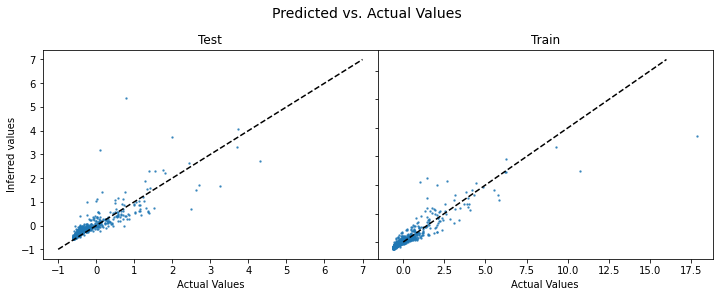

In [47]:
def nn_model_evaluation(model, skip_epochs=0, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train, y_test=y_test):
    
    # MSE and R Squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Test MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("Training R Squared:", round(r2_score(y_train, y_train_pred),4))
    print("Test R Squared:", round(r2_score(y_test, y_test_pred),4))
    
    # Scatterplot of inferred vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. Actual Values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.85, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(-1,8)), list(range(-1,8)), color='black', linestyle='--')
    ax1.set_title('Test')
    ax1.set_xlabel('Actual Values')
    ax1.set_ylabel('Inferred values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(0,17)), list(range(0,17)), color='black', linestyle='--')
    ax2.set_title('Train')
    ax2.set_xlabel('Actual Values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
nn_model_evaluation(nn)

In [48]:
import pickle
with open('rental_model_xgboost.pkl', 'wb') as file:
    pickle.dump(xgb_reg, file)

In [49]:
nn.save("nn_model.h5")